# Predict

使用神经网络预测波士顿房价

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from tqdm import tqdm
from easytorch.layer import Linear, ReLU, Tanh, Sequential
from easytorch.optim import SGD
from easytorch.tensor import Tensor
import easytorch.functional as F

## 1. 加载数据

In [2]:
dataset = load_boston()
data_x = dataset.data
data_y = dataset.target
data_name = dataset.feature_names
data_x = (data_x - data_x.mean(axis=0)) / (data_x.std(axis=0) + 1e-6)
data_x.shape, data_y.shape

((506, 13), (506,))

In [3]:
train_x = Tensor(data_x)
train_y = Tensor(data_y)

## 2. 搭建模型及训练

In [4]:
model = Sequential(
    Linear(13, 10),
    ReLU(),
    Linear(10, 1)
)
opt = SGD(model.parameters(), lr=3e-4)
loss_fn = F.l1_loss
loss_list = []

In [5]:
for _ in tqdm(range(500)):
    sum_loss = 0
    for x, y in zip(train_x, train_y):
        pred = model(x)
        loss = loss_fn(pred, y.reshape(1, 1))
        sum_loss += loss.data
        opt.zero_grad()
        loss.backward()
        opt.step()
    loss_list.append(sum_loss / len(train_x))

100%|██████████| 500/500 [00:44<00:00, 11.21it/s]


## 3. 结果

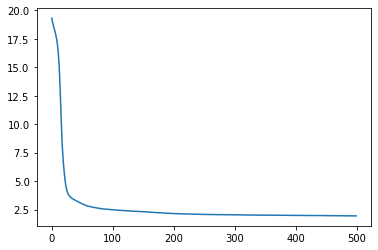

In [6]:
plt.plot(loss_list)
plt.show()

In [7]:
pred = model(train_x)
loss = loss_fn(pred, train_y.reshape(-1, 1)).mean()
loss

tensor(1.98941591887784, grad_fn=<MeanBackward>)